# Generate trajectories

In [1]:
from lle import LLE
from marl.models import TransitionMemory
import marlenv
from marl.env.best_aware import BestAwareEnv


lle_env = LLE.level(6).build()
world = lle_env.world
env = marlenv.Builder(lle_env).time_limit(78).build()
env = BestAwareEnv(env, world)


20.00	0.00	18.00	17.00	16.00	15.00	14.00	15.00	16.00	17.00	18.00	19.00	0.00	
19.00	18.00	17.00	16.00	15.00	14.00	13.00	14.00	15.00	16.00	17.00	18.00	0.00	
18.00	17.00	16.00	15.00	14.00	13.00	12.00	13.00	14.00	15.00	16.00	17.00	0.00	
0.00	0.00	15.00	14.00	13.00	12.00	11.00	12.00	13.00	14.00	15.00	16.00	0.00	
0.00	15.00	14.00	13.00	12.00	11.00	10.00	0.00	0.00	0.00	0.00	0.00	0.00	
15.00	14.00	13.00	12.00	11.00	10.00	9.00	10.00	11.00	12.00	13.00	14.00	0.00	
14.00	13.00	12.00	11.00	10.00	9.00	8.00	9.00	10.00	11.00	12.00	13.00	0.00	
13.00	12.00	11.00	10.00	9.00	8.00	7.00	0.00	11.00	12.00	13.00	14.00	0.00	
12.00	11.00	10.00	9.00	8.00	7.00	6.00	0.00	0.00	0.00	0.00	0.00	0.00	
11.00	10.00	9.00	8.00	7.00	6.00	5.00	4.00	3.00	2.00	1.00	1.00	0.00	
10.00	9.00	8.00	7.00	6.00	5.00	4.00	3.00	2.00	1.00	0.00	0.00	0.00	
10.00	9.00	8.00	7.00	6.00	5.00	4.00	3.00	2.00	1.00	0.00	0.00	0.00	


<Axes: >

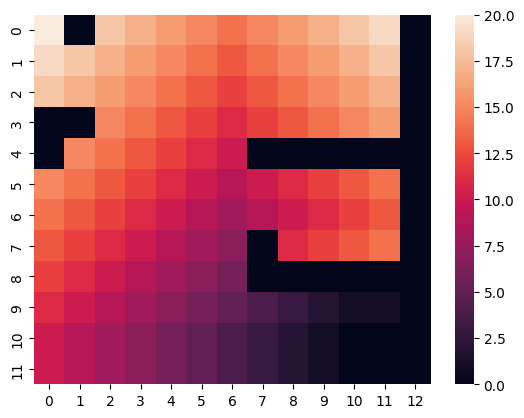

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

for row in env._distances:
    print()
    for i in range(len(row)):
        print(f"{row[i]:.2f}", end="\t")
print()
sns.heatmap(env._distances)

In [ ]:
from marl.training import DQN
from marl.nn import model_bank
from marl import Experiment
import marl


qnetwork = model_bank.qnetworks.IndependentCNN.from_env(env, mlp_noisy=True)
trainer = DQN(
    qnetwork,
    mixer=marl.nn.mixers.VDN.from_env(env),
    train_policy=marl.policy.ArgMax(),
    memory=TransitionMemory(10_000),
    gamma=0.95,
    double_qlearning=True,
    ir_module=None,
)

exp = Experiment.create(env, 2_000_000, trainer=trainer, test_interval=1000)
exp.run()